In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf

plt.rcParams["figure.figsize"]=14,6

In [2]:
# Definizione delle date di inizio e fine come stringhe
start = '2019-12-23'
end = '2023-12-13'

In [3]:
# Scaricamento dei dati dell'S&P 500 da Yahoo Finance utilizzando yfinance
gspc = yf.download('^GSPC', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
# Calcolo dei rendimenti logaritmici
gspc['LnRet'] = np.log(gspc['Close'] / gspc['Close'].shift(1))

In [5]:
# Visualizzazione delle prime righe del DataFrame
print(gspc.head())

Price                        Adj Close        Close         High          Low  \
Ticker                           ^GSPC        ^GSPC        ^GSPC        ^GSPC   
Date                                                                            
2019-12-23 00:00:00+00:00  3224.010010  3224.010010  3227.780029  3222.300049   
2019-12-24 00:00:00+00:00  3223.379883  3223.379883  3226.429932  3220.510010   
2019-12-26 00:00:00+00:00  3239.909912  3239.909912  3240.080078  3227.199951   
2019-12-27 00:00:00+00:00  3240.020020  3240.020020  3247.929932  3234.370117   
2019-12-30 00:00:00+00:00  3221.290039  3221.290039  3240.919922  3216.570068   

Price                             Open      Volume     LnRet  
Ticker                           ^GSPC       ^GSPC            
Date                                                          
2019-12-23 00:00:00+00:00  3226.050049  3064530000       NaN  
2019-12-24 00:00:00+00:00  3225.449951  1296530000 -0.000195  
2019-12-26 00:00:00+00:00  3227.1999

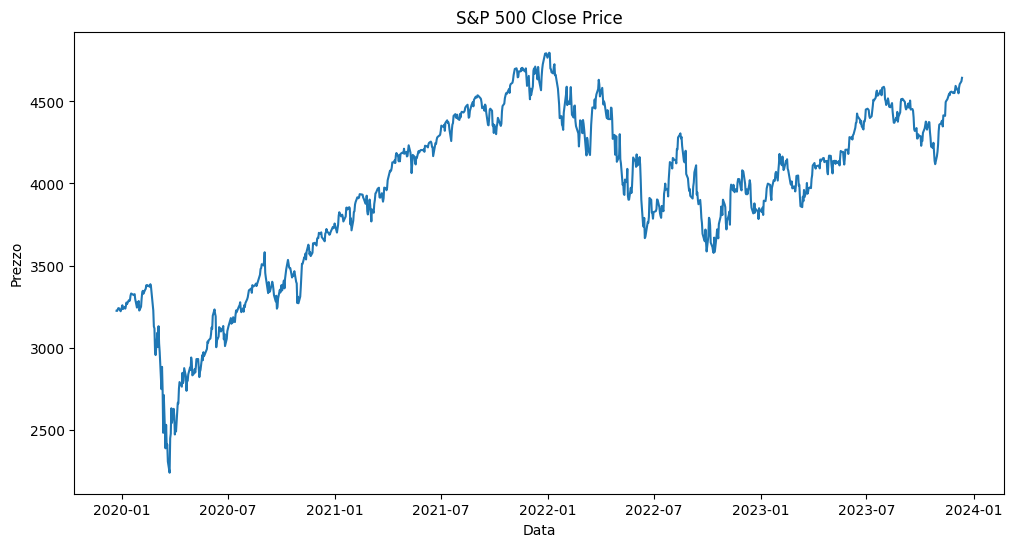

In [7]:
# Grafico dei prezzi di chiusura
plt.figure(figsize=(12, 6))
plt.plot(gspc['Close'])
plt.title('S&P 500 Close Price')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.tight_layout
plt.show()


In [ ]:
result = adfuller(np.log(gspc.Close))
print('ADF Statistic S&P 500 log-prices: %.2f' % result[0])
print('p-value: %.3f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.2f' % (key, value))